In [232]:
def recommend_with_svd(A,energy_percentage=0.9):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # SVD
    m = A.shape[0]
    n = A.shape[1]
    U,s,VT = np.linalg.svd(A, full_matrices=False)
    
    # 绘制原始矩阵
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(A, cmap='hot', interpolation='nearest')
    plt.title('Original Matrix')
    plt.xlabel('Items')
    plt.ylabel('Users')
    plt.xticks(np.arange(n), [f"Item {i+1}" for i in range(n)])
    plt.yticks(np.arange(m), [f"User {i+1}" for i in range(m)])
    
    # 计算能量百分比
    s2 = s**2
    for i in range(1,len(s)):
        if np.sum(s2[:i]) / np.sum(s2) >= energy_percentage:
            k = i
            break
    
    # 重构矩阵
    A_reconstructed = np.dot(U[:,:k],np.dot(np.diag(s[:k]),VT[:k,:]))
    
    # 填补未评价的项
    for i in range(m):
        for j in range(n):
            if A[i,j] == 0:
                sum_sim = 0
                for k in range(m):
                    if A[k,j] != 0:
                        cs = cos_sim(A_reconstructed[i,:],A_reconstructed[k,:].T)
                        sum_sim += cs
                        A[i,j] += cs*A[k,j]
                A[i,j] /= sum_sim

    # 绘制推荐矩阵
    plt.subplot(1, 2, 2)
    plt.imshow(A, cmap='hot', interpolation='nearest')
    plt.title('Recommendation Matrix')
    plt.colorbar()
    plt.xlabel('Items')
    plt.ylabel('Users')
    plt.xticks(np.arange(n), [f"Item {i+1}" for i in range(n)])
    plt.yticks(np.arange(m), [f"User {i+1}" for i in range(m)])
    plt.show()
    return A
            

In [233]:
def generate_evaluation_matrix(m,n,k):
    # 随机生成m*n的矩阵，其中有k个0
    import numpy as np
    matrix = np.random.randint(0, 101, (m, n))
    indices = np.random.choice(m * n, k, replace=False)
    zero_positions = np.unravel_index(indices, (m, n))
    matrix[zero_positions] = 0
    return matrix

In [234]:
def cos_sim(a,b):
    # 计算余弦相似度
    import numpy as np
    num=np.dot(a,b)
    denom=np.linalg.norm(a)*np.linalg.norm(b)
    return 0.5+0.5*(num/denom)

[[ 99 100   0  45  48   8  94  93  67  59]
 [ 41  51  77  69  75  37  75  39   0   0]
 [ 72  92  86  26  37  99  53   7  72  43]
 [  0   7   0  10   6  68  48  43  58  75]
 [  9   0  10  11  75  95  88  18  40  61]
 [ 68  46  71   0  33  87  24  66  51  40]
 [  0  56   9  84   0  83  41  84  16  11]
 [  1  77  22  97  30  84  81  69   3  43]
 [ 40  34  66  86   4  61  96  95  86  82]
 [ 58  57  61   0  31  40  67  23  27  66]]


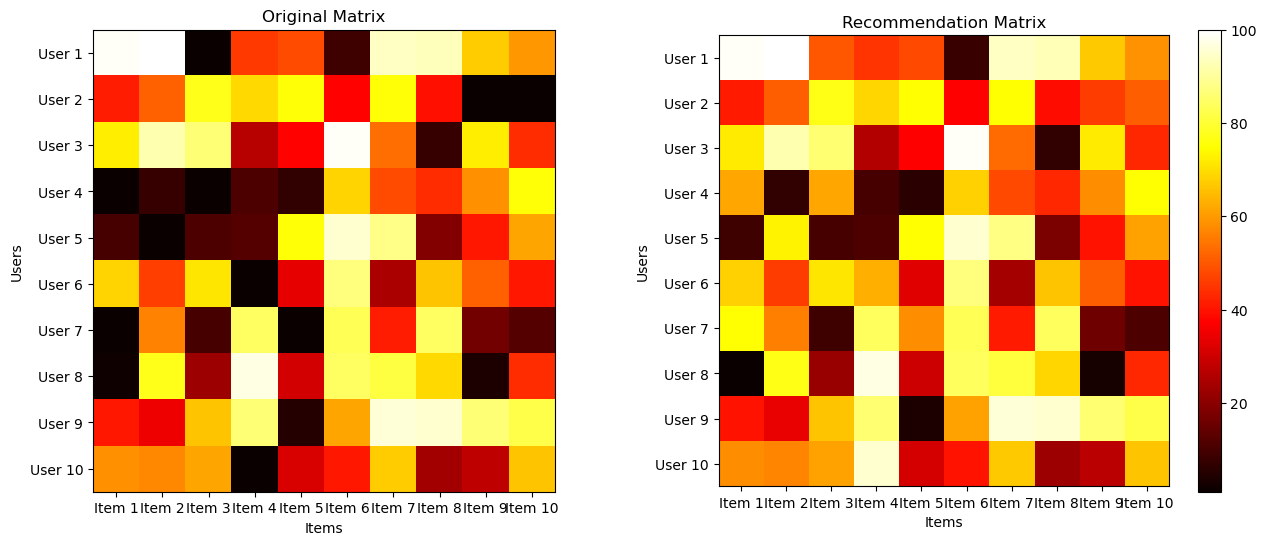

array([[ 99, 100,  50,  45,  48,   8,  94,  93,  67,  59],
       [ 41,  51,  77,  69,  75,  37,  75,  39,  46,  51],
       [ 72,  92,  86,  26,  37,  99,  53,   7,  72,  43],
       [ 62,   7,  62,  10,   6,  68,  48,  43,  58,  75],
       [  9,  73,  10,  11,  75,  95,  88,  18,  40,  61],
       [ 68,  46,  71,  63,  33,  87,  24,  66,  51,  40],
       [ 75,  56,   9,  84,  58,  83,  41,  84,  16,  11],
       [  1,  77,  22,  97,  30,  84,  81,  69,   3,  43],
       [ 40,  34,  66,  86,   4,  61,  96,  95,  86,  82],
       [ 58,  57,  61,  95,  31,  40,  67,  23,  27,  66]])

In [235]:
A = generate_evaluation_matrix(10,10,10)
print(A)
recommend_with_svd(A)